[Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)

## 1.1. Linear Models
`X = (n_samples, n_features)`  
`y = (n_samples,_)`  
$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$  
`w = (w_1,..., w_p)` as ``coef_`` and `w_0` as ``intercept_``.

>❗ `score` depends the model type: regression & classifier
1. classifier(`LogisticRegression`..) : accuracy
2. regression(`Ridge`..): $R^2$  

If we need other metrics, we should import `sk.metrics` . such as `zscore`, `mse`..

- ❗Models based on OLS, such as Lasso, Ridge, Linear Regression, Elastic-Net, are **pure-math-optimal without any stastical assumptions.**
- ❗Bayesian is stastical model with lots of assumptions!
- ❗Logistic Regression with entropy-loss is also  pure-math 

### 1.1.1. Ordinary Least Squares (Optimal target)
- $\min_{w} || X w - y||_2^2 = \min_{w} e^2 = \min_{w}\sum{(y_i-\hat{y_i})^2}$
- Why not use $||e||_1$ ? It will be a complex computation.

In [1]:
from sklearn.datasets import load_diabetes 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]] # only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 20, shuffle= False)
reg = LinearRegression().fit(X_train, y_train)

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


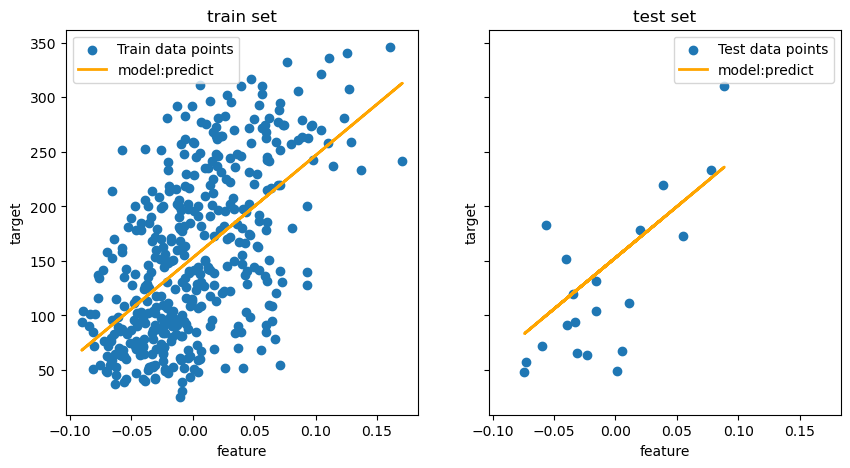

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols = 2, figsize = (10, 5), sharex= True, sharey=True)
ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(X_train, reg.predict(X_train), linewidth = 2, color = 'orange', label = 'model:predict')
ax[0].set(xlabel = 'feature', ylabel = 'target', title = 'train set')
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, reg.predict(X_test), linewidth = 2, color = 'orange', label = 'model:predict')
ax[1].set(xlabel = 'feature', ylabel = 'target', title = 'test set')
ax[1].legend()

#### 1.1.1.1. Non-Negative Least Squares
It is possible to constrain all the coefficients to be non-negative

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)
n_samples, n_features = 200 ,50
X = np.random.randn(n_samples, n_features)
coef = np.random.randn(n_features)
coef[coef < 0] = 0
y = np.dot(X, coef) + np.random.normal(size=(n_samples, ))

X_train, X_test, y_train, y_test = train_test_split(X, y)
reg_nn = LinearRegression(positive=True)
y_pred_nn = reg_nn.fit(X_train, y_train).predict(X_test)
print(f"reg non-negtive r2 score {r2_score(y_test, y_pred_nn)}")

reg = LinearRegression()
y_pred = reg.fit(X_train, y_train).predict(X_test)
print(f"reg r2 score {r2_score(y_test, y_pred)}")


reg non-negtive r2 score 0.9396445828467449
reg r2 score 0.9376680714353156


In [5]:
print(f'reg coef: {reg.coef_}')
print(f'reg non-negtive coef: {reg_nn.coef_}')

reg coef: [ 0.14558878 -0.01622696  0.04418599  0.0228349   1.37527142  0.04780507
  1.04852059  0.19843682  0.13334379  0.74454882  0.95109335  0.76991029
 -0.13500926 -0.01387608  0.78596047  0.09298937  0.06311712  0.50666431
  0.04104067  1.75239296  1.52473093  0.47126963  1.30291492  0.17344717
  0.74907941  1.49059758  0.4431638   0.02380454  0.10968332  0.07393084
  0.75337659  0.9352428   0.50193631 -0.0826637   0.0569293   0.01414517
  0.01170687  0.03987852  0.55779984  2.18720027  0.06680008  0.05979159
  0.06271348 -0.04990126  0.08592409  0.18586898  0.47907152  0.33054496
  0.42333748  0.49632499]
reg non-negtive coef: [0.12910413 0.         0.01295355 0.04930206 1.3604381  0.05102504
 1.04189006 0.18586485 0.11814676 0.73950794 0.93952109 0.79019273
 0.         0.         0.79003132 0.09910934 0.05240642 0.52331926
 0.03387404 1.75882324 1.55239345 0.46371201 1.28460157 0.19194232
 0.73504442 1.49014821 0.44576068 0.02531651 0.11827538 0.05634441
 0.73644988 0.94590754 

Text(0, 0.5, 'reg positive coef')

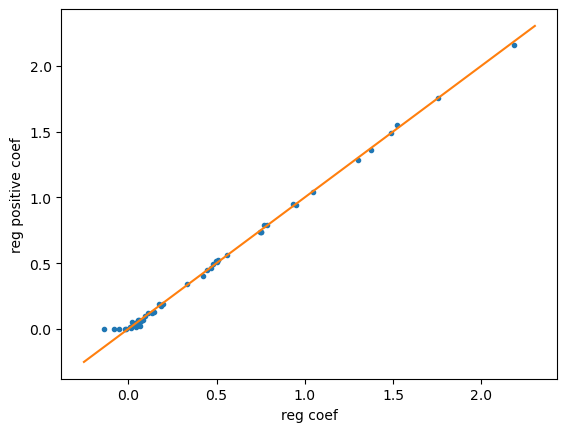

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(reg.coef_, reg_nn.coef_, linewidth = 0, marker = '.')
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = min(low_x, low_y)
high = max(high_x, high_y)
ax.plot([low, high], [low, high])
ax.set_xlabel('reg coef')
ax.set_ylabel('reg positive coef')

### 1.1.2. Ridge regression and classification


#### 1.1.2.1. Regression
Ridge regression addresses some of the problems of Ordinary Least Squares by **imposing a penalty on the size of the coefficients (L2)**. The ridge coefficients minimize a penalized residual sum of squares:
$$
   \min_{w} || X w - y||_2^2 + \alpha ||w||_2^2 
$$
The complexity parameter $\alpha \geq 0$ controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

---

> $\alpha$

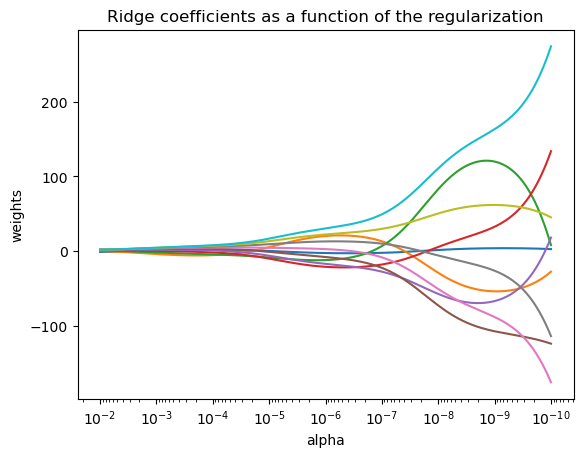

In [7]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas) #对数尺度上均匀分布，而非等线性间隔
coef_ = []
for a in alphas:
    ridge = linear_model.Ridge(fit_intercept=False, alpha=a);
    ridge.fit(X, y)
    coef_.append(ridge.coef_)
#print(coef_[0])
ax = plt.gca()
# (200,) (200, 10)
ax.plot(alphas, coef_)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Ridge coefficients as a function of the regularization")
plt.axis('tight')
plt.show()

📉  
- Since coef_ has 10 columns, the plot will contain 10 curves, each representing the change in a feature's coefficient as alpha increases.
- If $\alpha$ is too large, most coefficients will be 0, meaning this model only a constant value.

---

In [8]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = 0.5)
reg.fit([[0,0], [0,0], [1,1]], [0, 0.1, 1])
print('coef_ : ', reg.coef_)
print('intercept : ', reg.intercept_)

coef_ :  [0.34545455 0.34545455]
intercept :  0.1363636363636364


Note that the class Ridge allows for the user to specify that the solver be automatically chosen by setting solver="auto". Solver determine how the Ridge regression **compute the optimal weights $w$**, depending on the dataset size, sparsity, and numerical efficiency.

#### 1.1.2.2. Classification
The Ridge regressor has a classifier variant: *RidgeClassifier*. This classifier first converts binary targets to **{-1, 1}** and then treats the problem as a regression task, optimizing the same objective as above. For multiclass classification, the problem is treated as **multi-output regression**, and the predicted class corresponds to the output with the highest value.  

while the least squares loss is **not commonly used for classification** tasks, it can still give similar results as more traditional approaches like logistic regression or SVM. Additionally, the RidgeClassifier's use of this loss function provides flexibility in choosing solvers, which can lead to **more efficient computations** in certain situations.   

The **RidgeClassifier** can be significantly faster than **LogisticRegression** in multi-class problems because it only needs to compute the ❓projection matrix once, regardless of how many classes there are, while **LogisticRegression** needs to perform additional computations for each class. This gives the **RidgeClassifier** an advantage in terms of speed, particularly when working with a large number of classes.

---


[📌Classification of text documents using sparse features](./examples/Working%20with%20text%20documents.ipynb#classification-of-text-documents-using-sparse-features)


#### 1.1.2.3 complexity

#### 1.1.2.4 Set the regularization param:  RidgeCV , RidgeClassifierCV
they have built-in cv of the alpha. This work in the same way as GridSearchCV

In [11]:
import numpy as np
from sklearn import linear_model


In [13]:
np.logspace(-6,6,13) # 13个

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [18]:
reg = linear_model.RidgeCV(alphas = np.logspace(-6,6,13))
reg.fit([[0,0], [0,0], [1,1]], [0,.1,1])

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [19]:
reg.alpha_

np.float64(0.01)

### 1.1.3 Lasso


Compare to Ridge, Lasso have a L1 penality . When we need more 0 coefficients (sparse model), we can do it
$$
   \min_{w} || X w - y||_2^2 + \alpha ||w||_1
$$

> **L1 VS L2**

1. 定义  
L1: 某些系数会被完全压缩到 0，从而进行特征选择。  
L2: 不会让系数变成 0，而是让所有系数向 0 方向收缩，类似于“均匀压缩”。 
2. 直观理解（几何角度）  
Lasso 和 Ridge 的不同可以用约束区域来解释：  
L1：$i.e. (|w_1| + |w_2| \leq C)$约束是一个 **菱形（L1 球）**，优化时解往坐标轴方向靠近，导致某些系数精确为 0，实现变量选择。 L2: $i.e. (w_1^2 + w_2^2 \leq C^2)$约束是一个 **圆形区域**，优化过程中梯度会均匀收缩所有系数，导致所有特征都保留，只是值变小了。  


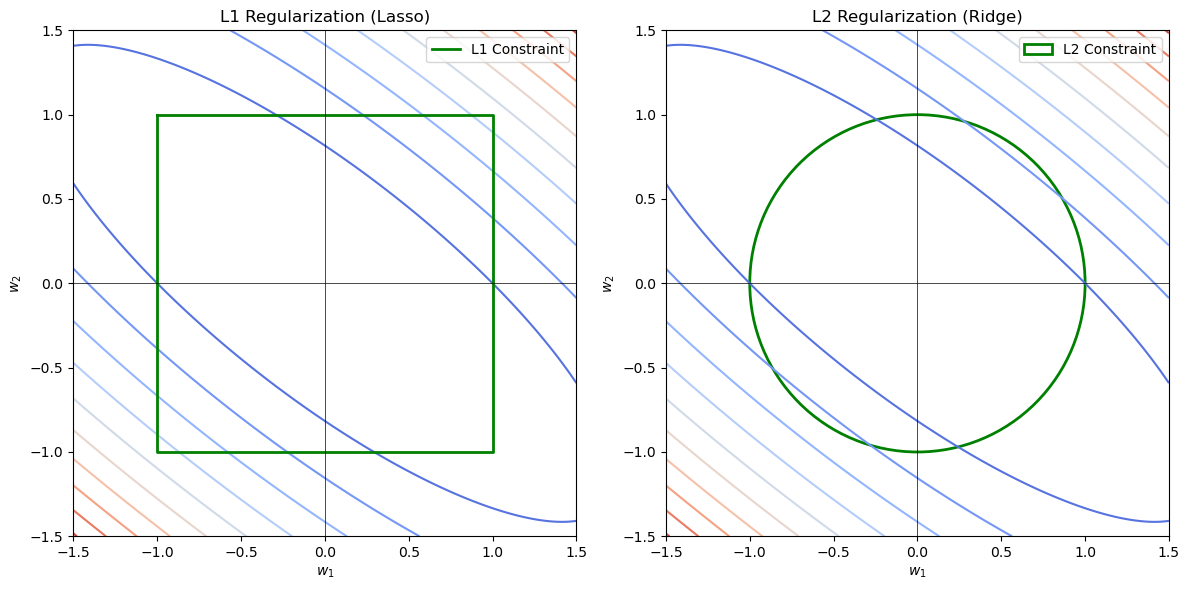

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成 w1 和 w2 的网格
w1 = np.linspace(-1.5, 1.5, 400)
w2 = np.linspace(-1.5, 1.5, 400)
W1, W2 = np.meshgrid(w1, w2)

# MSE 等高线（假设某个二元回归问题的等值线）
Z = W1**2 + 2*W1*W2 + 1.5*W2**2  # 这是一个典型的二次损失函数

# 创建绘图区域
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# --- L1 正则化（Lasso）：菱形约束 ---
ax[0].contour(W1, W2, Z, levels=10, cmap='coolwarm')  # 绘制损失函数等高线
ax[0].plot([-1, 1, 1, -1, -1], [1, 1, -1, -1, 1], 'g-', linewidth=2, label="L1 Constraint")  # 画菱形（L1 范数约束）
ax[0].set_title("L1 Regularization (Lasso)")
ax[0].set_xlabel(r'$w_1$')
ax[0].set_ylabel(r'$w_2$')
ax[0].axhline(0, color='black', linewidth=0.5)
ax[0].axvline(0, color='black', linewidth=0.5)
ax[0].legend()

# --- L2 正则化（Ridge）：圆形约束 ---
ax[1].contour(W1, W2, Z, levels=10, cmap='coolwarm')  # 绘制损失函数等高线
circle = plt.Circle((0, 0), 1, color='g', fill=False, linewidth=2, label="L2 Constraint")  # 画圆形（L2 范数约束）
ax[1].add_patch(circle)
ax[1].set_title("L2 Regularization (Ridge)")
ax[1].set_xlabel(r'$w_1$')
ax[1].set_ylabel(r'$w_2$')
ax[1].axhline(0, color='black', linewidth=0.5)
ax[1].axvline(0, color='black', linewidth=0.5)
ax[1].set_xlim([-1.5, 1.5])
ax[1].set_ylim([-1.5, 1.5])
ax[1].legend()

# 显示图像
plt.tight_layout()
plt.show()


In [2]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1)

In [3]:
model.predict([[0.5,0.5]])

array([0.5])

#### 1.1.3.1. Setting regularization parameter
$\alpha$ controls the **degree of sparsity** of the estimated coefficients.

AIC/BIC 和 CV 都是评估最优 $\alpha$判断策略， 至于$\alpha$选取迭代常常依赖于GridSearch
- AIC/BIC 是通过一次数据集训练，评估 每个$\alpha$对应模型。得到最优。（更像公式）
- CV 是通过多次分割数据集，为每个数据集组设置多个$\alpha$， 最后通过k组中众多个alpha最优 平均验证误差最小的，（更像统计）

**Method1：Using cross-validation**  
- LassoLarsCV  is based on  Least Angle Regression alg. (最小角回归)
- LassoCV

🦀[Lasso model selection: ](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html)

**Method2: Information-criteria**  
LassoLarsIC use the Akaike information criterion (**AIC**) and the Bayes Information criterion (**BIC**). 
- It's more cheaper than cv, because It computed $\alpha$ only once rather than k+1 times for k-fold cv.
- It's better for big dataset.
- It will penalize that over-complex Lasso Model by a score.
  

**1. AIC（赤池信息准则）**
AIC 衡量的是 **模型的拟合优度和复杂度的折中**，公式如下：
$$
AIC = 2k - 2\log(L)
$$
- $k$ 是非零特征个数, $L$ 是模型的最大似然估计。

**2. BIC（贝叶斯信息准则）**
BIC 也考虑了模型的拟合度和复杂度，但对复杂度的惩罚更严格：
$$
BIC = k\log(n) - 2\log(L)
$$
- $n$ 是样本数，$k$是非零特征个数，$L$ 是似然函数。

显然区别就是$\log n > 2$ , 所以BIC惩罚力度大 

**$log(L)$**:
假设误差服从正态分布$\mathcal{N}(0, \sigma^2)$,
$$
\log L = -\frac{n}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**总结**：
AIC/BIC ↓， 效果越好
- AIC 追求较好的拟合，可能会选择更多特征；
- BIC 惩罚复杂度更严，倾向于选择更少的特征；

1.1.3.1.4. Comparison with the regularization parameter of SVM
未完成。

### 1.1.4. Multi-task Lasso
尤其在一些时间序列下，会产生不同时间下的特征系数变动。 用这个比 Lasso重复更好。

🔗Joint feature selection with multi-task Lasso

### 1.1.5. Elastic-Net
Elastic-Net 是 **Lasso（L1 正则化）** 和 **Ridge（L2 正则化）** 的组合，用于线性回归模型的正则化。其目标函数为：

$$
\underset{\mathbf{w}}{\min} \ \frac{1}{2n} \sum_{i=1}^{n} (y_i - \mathbf{X}_i \mathbf{w})^2 + \alpha \left[ \frac{(1 - \rho)}{2} \|\mathbf{w}\|_2^2 + \rho \|\mathbf{w}\|_1 \right]
$$

结合了L1和L2的优点：
- Lasso L1 会在多个相关特征随机选择一个，其余坍塌为0
- Ridge L2 会让多相关特征贡献变小。不会成0。  

Elastic-Net 可以通过`l1_ratio`控制L1:L2, 多相关特征不会大部分坍塌为0，又能保证相关特征贡献较小。
- `l1_ratio=1` : L1
- `l1_ratio=0` : L2

🔗L1-based models for Sparse Signals  
🔗Lasso, Lasso-LARS, and Elastic Net paths

### 1.1.6. Multi-task Elastic-Net

### 1.1.7. Least Angle Regression
LARS is a **regression alg.** for high-dimension data. It is similar to forward stepwise regression(逐步回归，每一步更新一个最优特征系数).   
At each step, it finds the **feature most related** with the target.When there are many features having euqal correlation, it proceeds in **a direction equiangular(等角)** between the features.

The LARS model can be used via the estimator `Lars`, or its low-level implementation `lars_path` or `lars_path_gram`.

### 1.1.8. LARS Lasso
`LassoLars` is a lasso model implemented using the **LARS alg**., and unlike the implementation based on **coordinate descent alg.**.

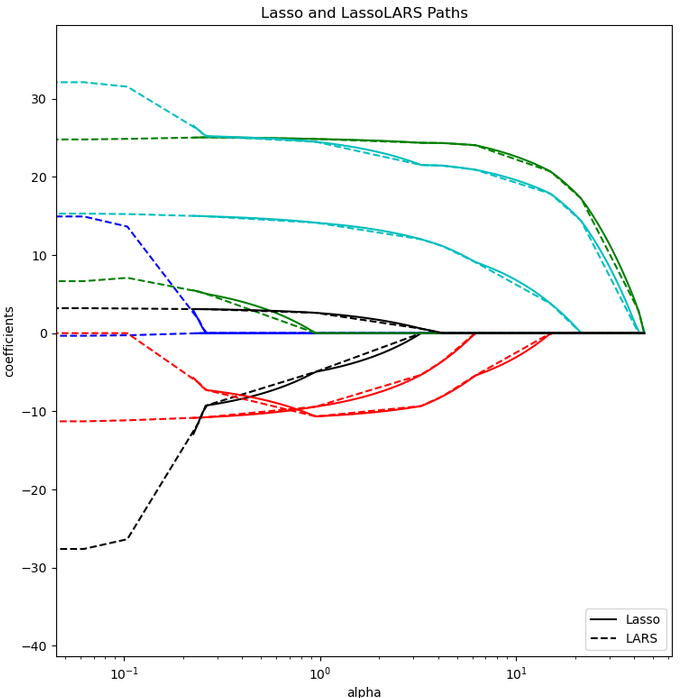

🔗Lasso, Lasso-LARS, and Elastic Net paths

### 1.1.9. Orthogonal Matching Pursuit (OMP) (正交匹配追踪)
OMP once select the most related feature. Then fix this feature coef., repeat regression to calculate other feature. 

🔗Orthogonal Matching Pursuit

### 1.1.10. Bayesian Regression
Bayesian regression techniques will be used in Regulartion (L1,L2). Ridge and Lasso set initial $\alpha$ mually. Now we can estimate the $\alpha$ by introducing priors.(贝叶斯参数估计)  
**Bayesian regression is a probabilistic model**, 就是得到w和y观测的概率分布



**Baysian estimate**  $w$

$$
p(w|y观测) = \frac{p(y观测|w) \cdot p(w)}{p(y观测)}
$$
就是根据y观测估计w系数， 假设这两个服从相关的两个概率模型，通过alpha,lambda控制。
目的就是 让这两个概率分布稳定， 即得到了整个稳定模型系统。
估计的过程就是更新alpha,lambda让其收敛，即让概率分布稳定。

🫥普通贝叶斯（没有超参数先验）

**Hyper paramters** 更新:  $y$和$w$概率模型参数  
更新使用经验贝叶斯（Empirical Bayes）方法，假设 $\alpha$ 和 $\lambda$ 都是固定值
$$
  \alpha = \frac{N}{||y - X\mu||^2 + \text{Tr}(\Sigma X^T X)}
$$
$$
  \lambda = \frac{M}{\mu^T \mu + \text{Tr}(\Sigma)}
$$
- N： samples, M: features



**Likelihood**: 即优化目标 就是 我们观测到的数据概率最大
$$
 p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha^{-1})
$$
- $y$ is observered data!
- $y$ is assumed to be Gaussian distrubtion. $\mathcal{N}(X w,\alpha^{-1})$. (To explain observation with different $\mathcal{N}$)
- The error $y - \hat{y}$ is assumed to be Gaussian distrubtion. $\mathcal{N}(0,\alpha^{-1})$
- $\alpha$  is again treated as a random variable that is to be estimated from the data.
- $\alpha$ controls the noise.  $\alpha$ ↑, $y$ noise ↓


**posterior**    
Estimate $w$ (后验分布)
$$p(w | X, y, \alpha, \lambda) = \mathcal{N}(w | \mu, \Sigma)$$
- Mean:$ \mu = \alpha \Sigma X^T y$
- CorVariance:$\Sigma = (\alpha X^T X + \lambda I)^{-1}$



估计过程：
1. 假设$\alpha$, $\lambda$ 初值
2. 通过$\alpha$, $\lambda$ 得到 $y$观测值 **概率分布**
3. 通过$\alpha$, $\lambda$，$y$观测值， 得到 $w$后验**分布**，
4. 用$\mu$ 计算$\alpha$, $\lambda$ 后验分布 更新$\alpha$, $\lambda$
5. 迭代计算$w$后验分布， 继续更...
6. 迭代，直至$\alpha$, $\lambda$ 收敛
7. 得到稳定的 $w$后验分布

🫥完全贝叶斯带 超先验

**Hyper Prior**  
Prior $w$ 
$$
p(w | \lambda) = \mathcal{N}(0, \lambda^{-1} I)
$$
- It's simlar to L2. It make $w$ closer to 0.

Prior $\alpha$ $\lambda$
$$
p(\alpha) = \text{Gamma}(\alpha | \alpha_1, \alpha_2), \quad p(\lambda) = \text{Gamma}(\lambda | \lambda_1, \lambda_2)
$$
- $\alpha_1, \alpha_2,\lambda_1, \lambda_2$ is some prior fix value.


**Hyper paramters** 更新:   
变分推断（Variational Inference）方法：

$$\alpha = \frac{N/2 + \alpha_1}{\frac{1}{2} ||y - X\mu||^2 + \text{Tr}(\Sigma X^T X) + \alpha_2} $$
$$ \lambda = \frac{M/2 + \lambda_1}{\frac{1}{2} \mu^T \mu + \text{Tr}(\Sigma) + \lambda_2} $$
- 反映超参数的分布特性。

**Predict** $\hat{y}$ is a distribution!

$$
p(y^* | X^*, X, y) = \mathcal{N}(y^* | \mu_{y^*}, \sigma_{y^*}^2)
$$

- Mean：
$
  \mu_{y^*} = X^* \mu_w
$

- Variance：
$
  \sigma_{y^*}^2 = X^* \Sigma_w (X^*)^T + \alpha^{-1}
$

- $ X^* $ 是测试集输入数据。

即输入一个测试数据，就会产生一个分布，


#### 1.1.10.1. Bayesian Ridge Regression
完全贝叶斯

In [1]:
from sklearn.linear_model import BayesianRidge
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = BayesianRidge()
reg.fit(X,Y)

BayesianRidge()

In [5]:
reg.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'max_iter': 300,
 'tol': 0.001,
 'verbose': False}

🔗Curve Fitting with Bayesian Ridge Regression

#### 1.1.10.2. Automatic Relevance Determination - ARD
The linear model is very similar to Bayesian Ridge, but leads to sparser coefficients $w$.
$$
P(w_j) = \mathcal{N}(0, \lambda_j)
$$
For every feature coef. , set a $\lambda$. It adjust coef. Coef ↑， $\lambda_j$ ↓

🔗Comparing Linear Bayesian Regressors

### 1.1.11. Logistic regression
It is implemented as a **linear model** for classification rather then regression.
The probabilities describing the outcomes are modeled using a logistic func.

Compare to linear regression: Logistic looks like a wrapper.!
- Predict value -> Predict probabilty. (Sigmod)
- Loss MSE err -> Loss (log, Cross-Entroy)
- Regression a value -> Class

> ℹ️ **Regularization** is default, which is common in machine learning but not in statistics.

🔗 L1 Penalty and Sparsity in Logistic Regression  

🔗 Regularization path of L1- Logistic Regression 

🔗 Decision Boundaries of Multinomial and One-vs-Rest Logistic Regression

#### 1.1.11.1 binary case
$y_i \in \{0,1\}$ , once fitted, `predict_proba` method of `LogisticRegression` predicts the prob of the positive class  

$$\hat{p}(y_i=1|X_i) = expit(X_i w+w_0) = \frac{1}{1 + \exp(-X_i w - w_0)}$$                       
- $w$ is a vector.    

As an optimization problem, logistic regression with regularization will min the cost function:(mle)


$$
\min_{w} \frac{1}{S}\sum_{i=1}^n s_i        
    \left(-y_i \log(\hat{p}(X_i)) - (1 - y_i) \log(1 - \hat{p}(X_i))\right)
    + \frac{r(w)}{S C}\,,
    $$
- $s_i$ : weights for a specific training sample.  $S = \sum_{i=1}^n s_i$

We have four choices for the regularization $r(w)$ :

| penalty        | $r(w)$                          |
|--|--|
| `None`         | 0                                      |
| $ \ell_1$ | $ \|w\|_1$                               |
| $ \ell_2$  | $ \frac{1}{2}\|w\|_2^2 = \frac{1}{2}w^T w$  |
| `ElasticNet`   | $ \frac{1 - \rho}{2}w^T w + \rho \|w\|_1$      

- $\rho$ is `l1_ratio`

#### 1.1.11.2 Mutli case    
Extend to K classes.  vector $w$ change to a matrix $W$. Each vector $W_k$ corresponds to $y_k$.
$$y_k = w_k^T x$$
$$  P(y = k | x) = \frac{\exp(y_k)}{\sum_{j=1}^{K} \exp(y_j)}$$   
We can use `predict` get the result

🔗 Decision Boundaries of Multinomial and One-vs-Rest Logistic Regression

#### 1.1.11.3. Solvers      
There are diferent solver methods.(different regularization path ) `solver` specify it.    
- `liblinear`: 坐标轴下降法。适用：小数据，L1/L2
- `lbfgs`: 二阶优化。 适用：L2正则   （默认）
- `sag`: SAG, 随机平均梯度下降。 适用：大数据，L2 正则。
- `saga`：SAG, 随机平均梯度下降。 适用：大数据，L1/L2/ElasticNet

### 1.1.12. Generalized Linear Models
GLM assume that $y$ have some distribution. GLM extend linear models in two ways:
1. inverse link function $h$
$$
\hat{y} = h(X w)
$$
1. OLS -> d
$$\min_{w} \frac{1}{2 n_{\text{samples}}} \sum_i d(y_i, \hat{y}_i) + \frac{\alpha}{2} ||w||_2^2$$


| $y$ Distribution |Target Domain|   Unit Deviance $d(y, \hat{y})$|inverse link|link|
|----|-----|----|--|--|
|Normal |$y \in (-\infty, \infty)$   |$(y-\hat{y})^2$|E|g|
|Bernoulli |$y \in \{0, 1\}$   |$2({y}\log\frac{y}{\hat{y}}+({1}-{y})\log\frac{{1}-{y}}{{1}-\hat{y}})$|h|g|
|Categorical       |$y \in \{0, 1, ..., k\}$    |$2\sum_{i \in \{0, 1, ..., k\}} I(y = i) y_\text{i}\log\frac{I(y = i)}{\hat{I(y = i)}}$|h|g|h|g|
|Poisson  |$y \in [0, \infty)$|$2(y\log\frac{y}{\hat{y}}-y+\hat{y})$|
|Gamma    |$y \in (0, \infty)$|$2(\log\frac{\hat{y}}{y}+\frac{y}{\hat{y}}-1)$|h|g|
|Inverse Gaussian  |$y \in (0, \infty)$|$\frac{(y-\hat{y})^2}{y\hat{y}^2}$|h|g|

Example of use cases:
- Agriculture / weather modeling: number of rain events per year (Poisson), amount of rainfall per event (Gamma), total rainfall per year (Tweedie / Compound Poisson Gamma).
- 。。。。

`TweedieRegressor` implements GLM with power param.But there are more convennient.
- normal : `Ridge`, `ElasticNet`..
- poisson: `PoissonRegressor`
- gamma: `GammaRegressor`


### 1.1.13. Stochastic Gradient Descent - SGD

### 1.1.16. Robustness regression: outliers and modeling errors

🔗Robust linear estimator fitting

Note, robust fitting in high-dimensional setting (large n_features) is very hard. 

RANSAC: Random Sample Consenius  
Princple:
- 把数据分为inliers and outliers.
- 反复从数据集随机选择少量点拟合
- 统计有多少点和模型接近，如果接近的点足够多，就认为是模型正确。
场景；
- 异常占比很高，但是内点很好

Theil-Sen:  
原理：
- 计算所有数据点对之间斜率，去其中位数作为最终回归斜率。
场景：
- 异常值少30%

Huber:
- 少量异常值 10%

### 1.1.17. Quantile Regression

🔗 Quantile regression

### 1.1.18 Polynomial regression
Using linear models train nonlinear functions.  
`poly = PolynomialFeatures(degree=2)` trans $[x_1, x_2]$ to $[1,x_1,x_2,x_1^2,x_2^2]$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [8]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [10]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [12]:
model= Pipeline(steps=[
    ('poly',PolynomialFeatures(degree=3)),
    ('linear',LinearRegression(fit_intercept=False))
])

In [14]:
X = np.arange(5)
y = 3 - 2*X + X**2 - X**3

In [16]:
model.fit(X[:,np.newaxis],y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])

In [18]:
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])